In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/ai-uis-student


In [ ]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf

sns.set_theme()
pd.__version__

'2.0.3'

In [ ]:
#@title **Cargar el dataset**
nba_stats = pd.read_csv('data/NBA.csv',sep =";", encoding='latin-1')

In [ ]:
#@title **Datos Generales**


print("columns and shape", nba_stats.columns, nba_stats.shape)
nba_stats.describe()

columns and shape Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object') (679, 30)


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,...,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,270.547865,26.159057,31.932253,14.412371,18.053756,2.963770,6.395287,0.437513,0.914138,2.565832,...,0.675054,0.814728,2.384831,3.199116,1.935935,0.560530,0.376878,0.932253,1.480412,8.043888
std,160.892359,4.374238,19.662975,19.574927,10.107631,2.443246,4.954201,0.139719,0.881324,2.230391,...,0.268814,0.788891,1.789149,2.398266,1.850729,0.414028,0.420084,0.763631,0.824612,6.725691
min,1.000000,19.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132.500000,23.000000,13.000000,0.000000,9.500000,1.100000,2.600000,0.394000,0.200000,0.700000,...,0.626000,0.300000,1.000000,1.400000,0.700000,0.200000,0.100000,0.400000,0.900000,2.900000
50%,276.000000,25.000000,35.000000,3.000000,17.200000,2.200000,4.900000,0.447000,0.700000,2.000000,...,0.757000,0.600000,2.000000,2.700000,1.300000,0.500000,0.300000,0.700000,1.400000,6.000000
75%,408.500000,29.000000,50.000000,26.000000,26.850000,4.350000,9.100000,0.500000,1.400000,3.800000,...,0.835000,1.100000,3.300000,4.300000,2.700000,0.800000,0.500000,1.300000,2.100000,11.650000
max,548.000000,39.000000,61.000000,61.000000,37.800000,11.800000,23.600000,1.000000,5.000000,12.200000,...,1.000000,6.000000,9.900000,13.200000,11.400000,2.100000,3.300000,4.300000,4.000000,35.300000




```
  - Rk: Rank
  - Player: Player's name
  - Pos: Position
  - Age: Player's age
  - Tm: Team
  - G: Games played
  - GS: Games started
  - MP: Minutes played per game
  - FG: Field goals per game
  - FGA: Field goal attempts per game
  - FG%: Field goal percentage
  - 3P: 3-point field goals per game
  - 3PA: 3-point field goal attempts per game
  - 3P%: 3-point field goal percentage
  - 2P: 2-point field goals per game
  - 2PA: 2-point field goal attempts per game
  - 2P%: 2-point field goal percentage
  - eFG%: Effective field goal percentage
  - FT: Free throws per game
  - FTA: Free throw attempts per game
  - FT%: Free throw percentage
  - ORB: Offensive rebounds per game
  - DRB: Defensive rebounds per game
  - TRB: Total rebounds per game
  - AST: Assists per game
  - STL: Steals per game
  - BLK: Blocks per game
  - TOV: Turnovers per game
  - PF: Personal fouls per game
  - PTS: Points per game
```

In [ ]:
nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      679 non-null    int64  
 1   Player  679 non-null    object 
 2   Pos     679 non-null    object 
 3   Age     679 non-null    int64  
 4   Tm      679 non-null    object 
 5   G       679 non-null    int64  
 6   GS      679 non-null    int64  
 7   MP      679 non-null    float64
 8   FG      679 non-null    float64
 9   FGA     679 non-null    float64
 10  FG%     679 non-null    float64
 11  3P      679 non-null    float64
 12  3PA     679 non-null    float64
 13  3P%     679 non-null    float64
 14  2P      679 non-null    float64
 15  2PA     679 non-null    float64
 16  2P%     679 non-null    float64
 17  eFG%    679 non-null    float64
 18  FT      679 non-null    float64
 19  FTA     679 non-null    float64
 20  FT%     679 non-null    float64
 21  ORB     679 non-null    float64
 22  DR

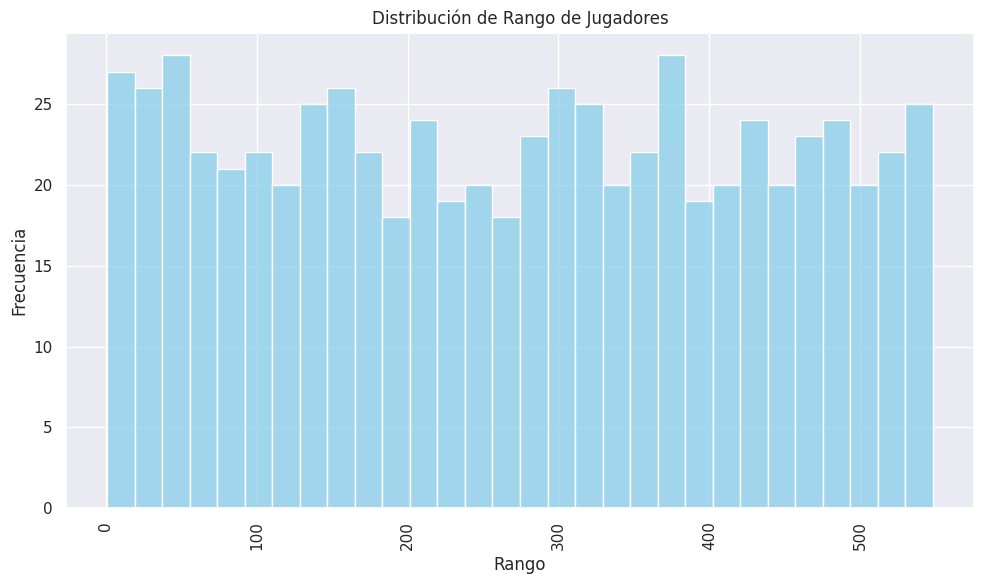

In [ ]:
#@title **Rank**

# Graficar el histograma de los rangos de los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='Rk', bins=30, kde=False, color='skyblue')
plt.title('Distribución de Rango de Jugadores')
plt.xlabel('Rango')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor claridad
plt.tight_layout()  # Ajustar el diseño de la trama
plt.show()



<ipython-input-14-26e5c96ef197>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=nba_stats, y='Player', palette='viridis')
<ipython-input-14-26e5c96ef197>:15: UserWarning: Glyph 154 (\x9a) missing from current font.
  plt.tight_layout()
<ipython-input-14-26e5c96ef197>:15: UserWarning: Glyph 138 (\x8a) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


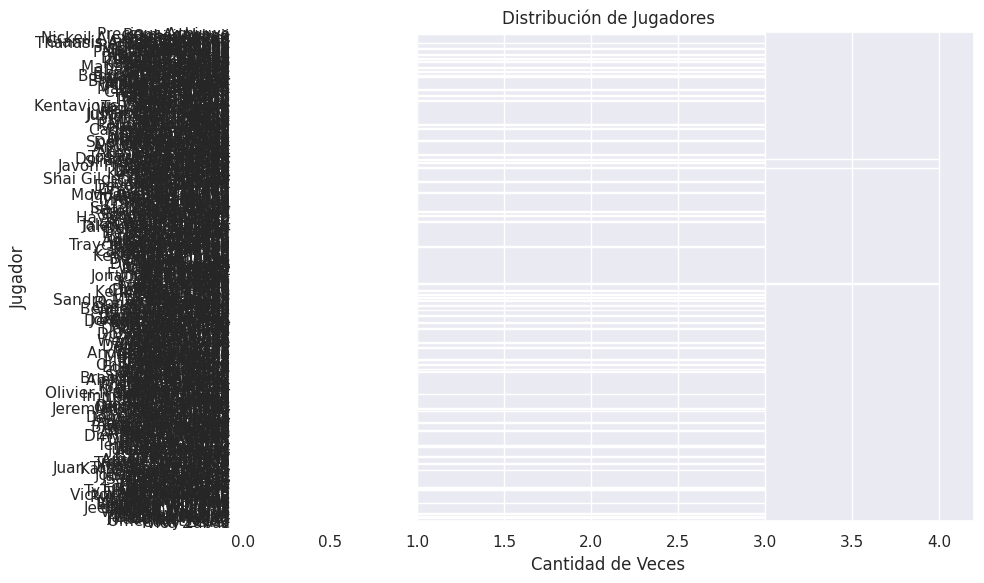

<ipython-input-14-26e5c96ef197>:24: UserWarning: Glyph 154 (\x9a) missing from current font.
  plt.tight_layout()
<ipython-input-14-26e5c96ef197>:24: UserWarning: Glyph 138 (\x8a) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


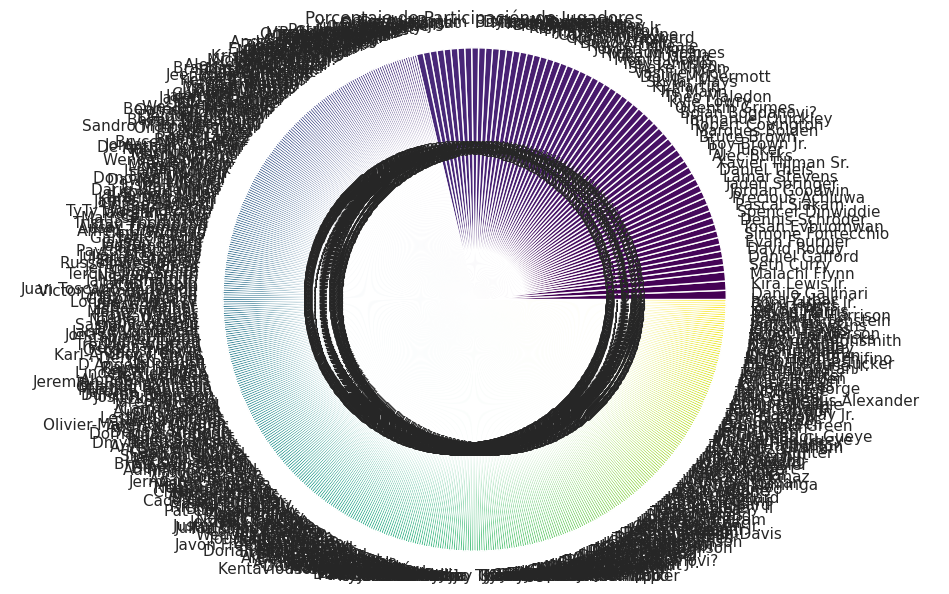

In [ ]:
#@title **Players**

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes tu dataset almacenado en una variable llamada 'nba_stats'

# Diagrama de barras para la columna 'Players'
plt.figure(figsize=(10, 6))
sns.countplot(data=nba_stats, y='Player', palette='viridis')
plt.title('Distribución de Jugadores')
plt.xlabel('Cantidad de Veces')
plt.ylabel('Jugador')
plt.tight_layout()
plt.show()

# Diagrama de pastel (pie chart) para la columna 'Players'
plt.figure(figsize=(10, 6))
player_counts = nba_stats['Player'].value_counts()
plt.pie(player_counts, labels=player_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(player_counts)))
plt.title('Porcentaje de Participación de Jugadores')
plt.axis('equal')  # Asegura que el pastel sea un círculo
plt.tight_layout()
plt.show()


<ipython-input-19-a1c5e47f7a08>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=nba_stats, x='Pos', palette='viridis')


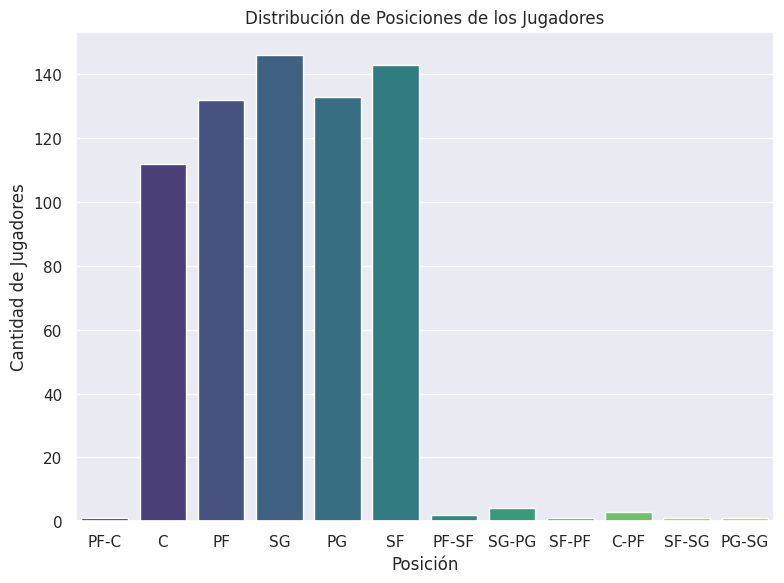

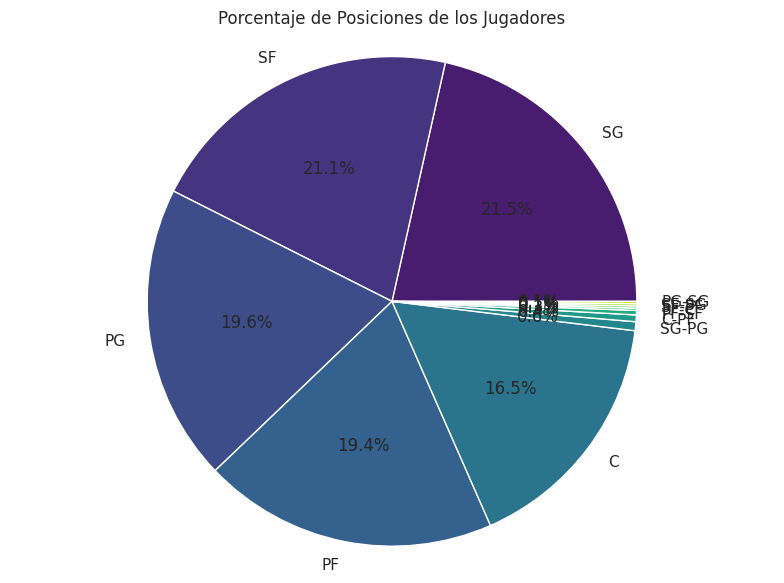

In [ ]:
#@title **Pos**

# Diagrama de barras para la columna 'Pos'
plt.figure(figsize=(8, 6))
sns.countplot(data=nba_stats, x='Pos', palette='viridis')
plt.title('Distribución de Posiciones de los Jugadores')
plt.xlabel('Posición')
plt.ylabel('Cantidad de Jugadores')
plt.tight_layout()
plt.show()

# Diagrama de pastel (pie chart) para la columna 'Pos'
plt.figure(figsize=(8, 6))
pos_counts = nba_stats['Pos'].value_counts()
plt.pie(pos_counts, labels=pos_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(pos_counts)))
plt.title('Porcentaje de Posiciones de los Jugadores')
plt.axis('equal')  # Asegura que el pastel sea un círculo
plt.tight_layout()
plt.show()

# https://es.wikipedia.org/wiki/Posiciones_del_baloncesto#Posiciones

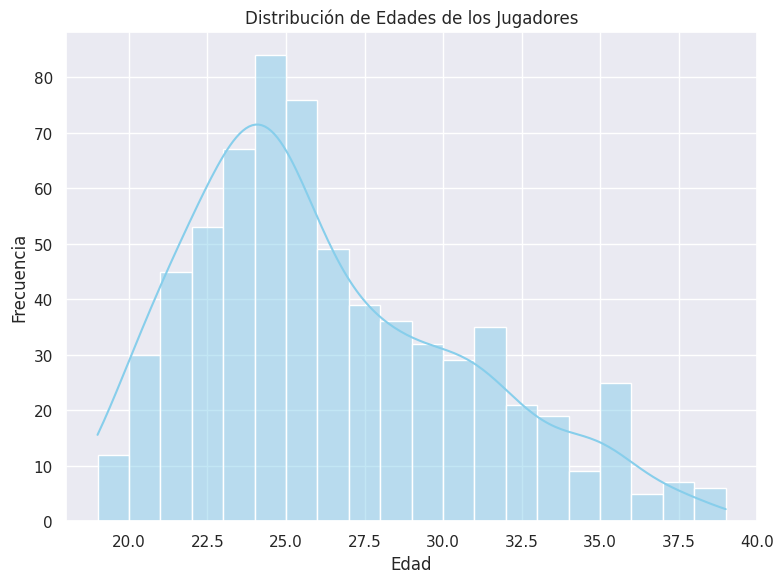

In [ ]:
#@title **Age**

# Graficar un histograma de las edades de los jugadores
plt.figure(figsize=(8, 6))
sns.histplot(data=nba_stats, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edades de los Jugadores')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

<ipython-input-24-102ead360320>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=nba_stats_filtered, x='Tm', palette='viridis')


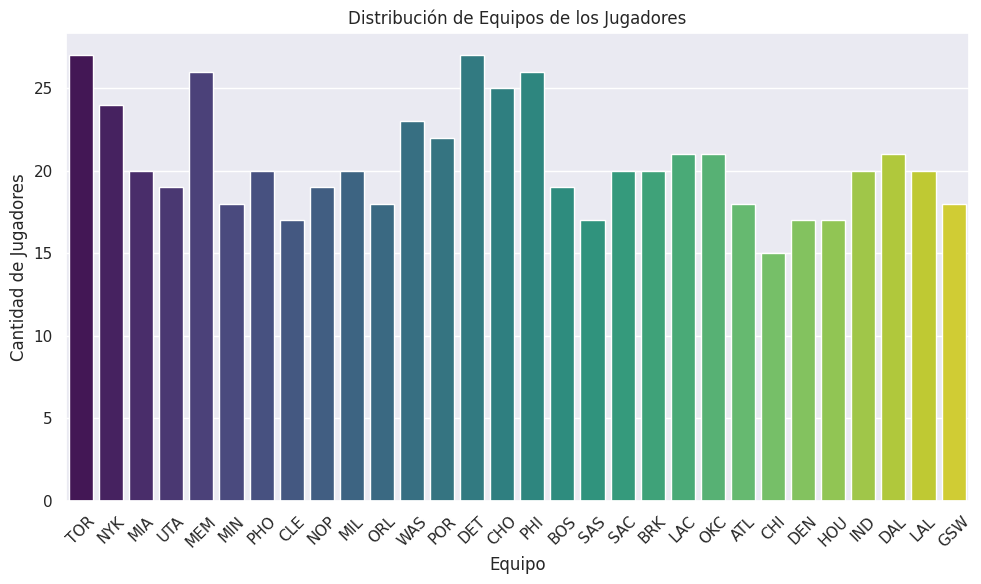

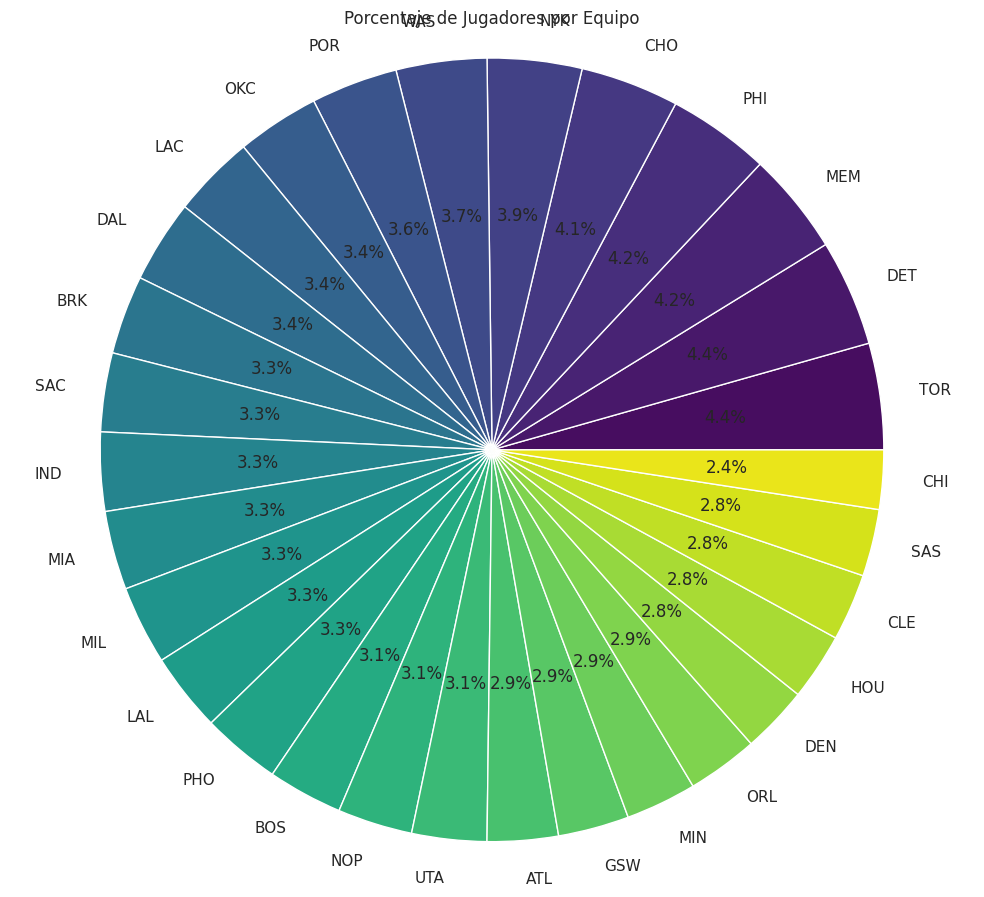

In [ ]:
#@title **Teams**

# Diagrama de barras para la columna 'Tm' (equipos)

# Filtrar el DataFrame para excluir la categoría 'TOT'
nba_stats_filtered = nba_stats[nba_stats['Tm'] != 'TOT']

# Diagrama de barras para la columna 'Tm' (equipos)
plt.figure(figsize=(10, 6))
sns.countplot(data=nba_stats_filtered, x='Tm', palette='viridis')
plt.title('Distribución de Equipos de los Jugadores')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Jugadores')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad
plt.tight_layout()
plt.show()

# Diagrama de pastel (pie chart) para la columna 'Tm' (equipos)
plt.figure(figsize=(10, 9))
team_counts = nba_stats_filtered['Tm'].value_counts()
plt.pie(team_counts, labels=team_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(team_counts)))
plt.title('Porcentaje de Jugadores por Equipo')
plt.axis('equal')  # Asegura que el pastel sea un círculo
plt.tight_layout()
plt.show()

<ipython-input-27-495e0f43375e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=nba_stats, x='G', palette='viridis')


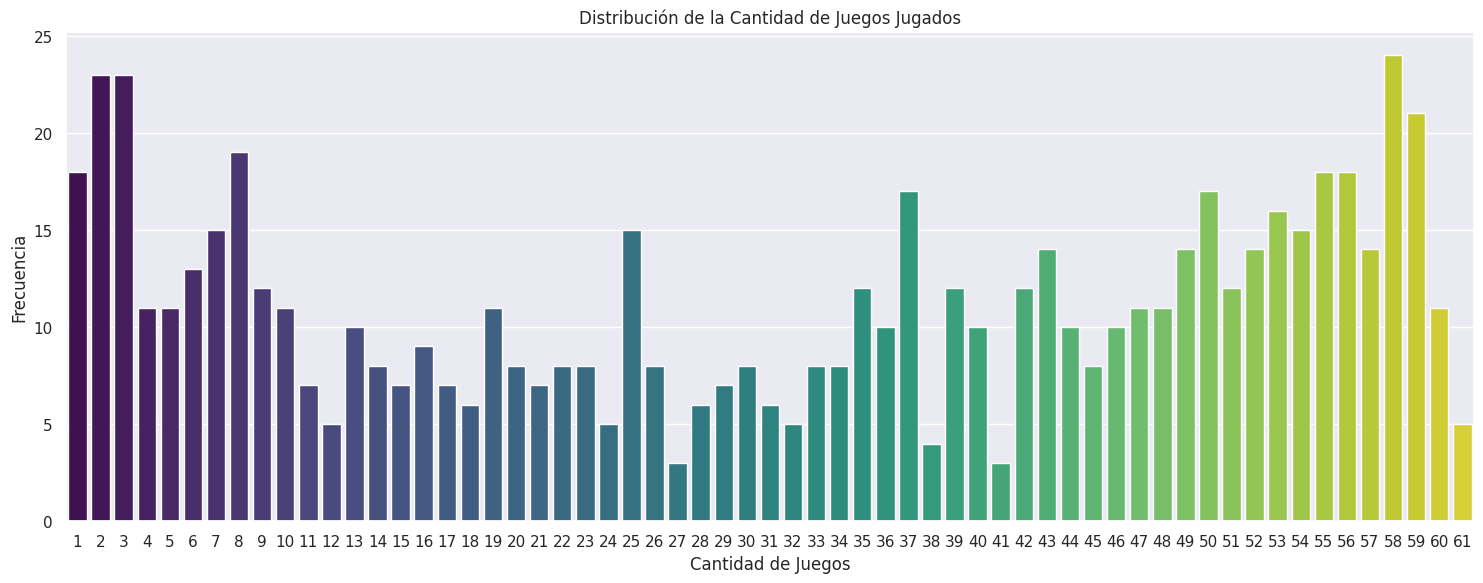

In [ ]:
#@title **Games Played**
# Diagrama de barras para la columna 'G' (cantidad de juegos jugados)
plt.figure(figsize=(15, 6))
sns.countplot(data=nba_stats, x='G', palette='viridis')
plt.title('Distribución de la Cantidad de Juegos Jugados')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

<ipython-input-29-9e7439bb6045>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=nba_stats, x='GS', palette='viridis')


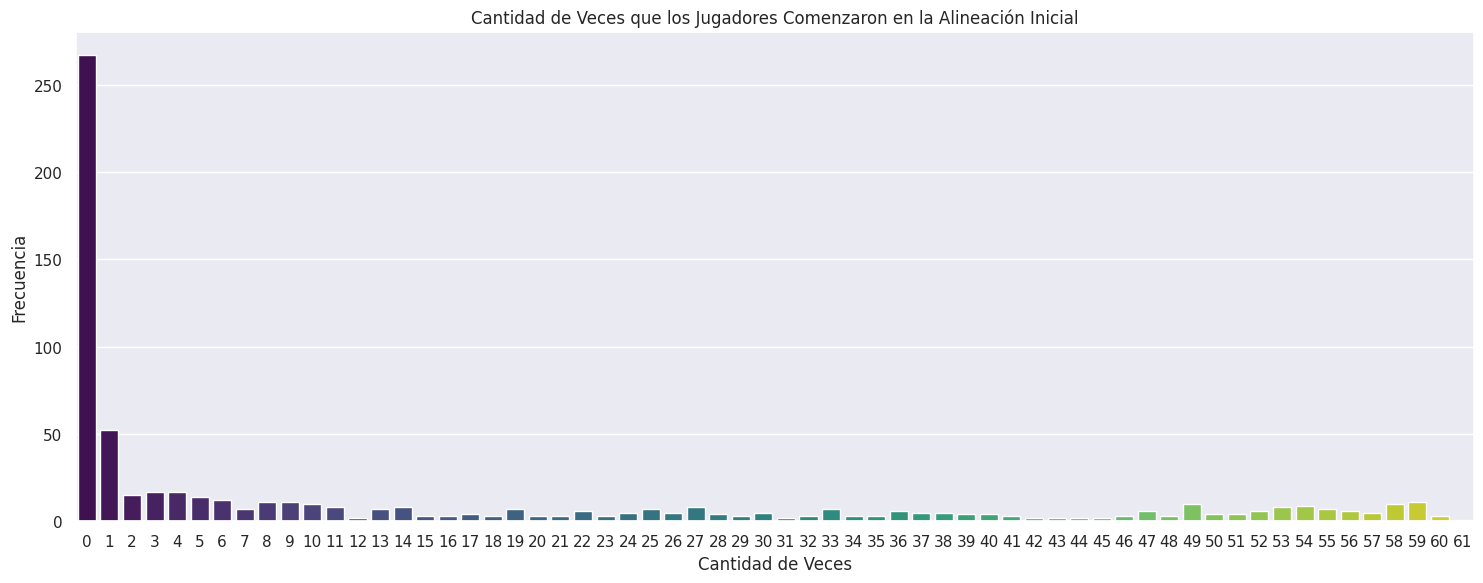

In [ ]:
#@title **Games Started**

# Diagrama de barras para la columna 'GS' (cantidad de veces que el jugador comenzó en la alineación inicial)
plt.figure(figsize=(15, 6))
sns.countplot(data=nba_stats, x='GS', palette='viridis')
plt.title('Cantidad de Veces que los Jugadores Comenzaron en la Alineación Inicial')
plt.xlabel('Cantidad de Veces')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

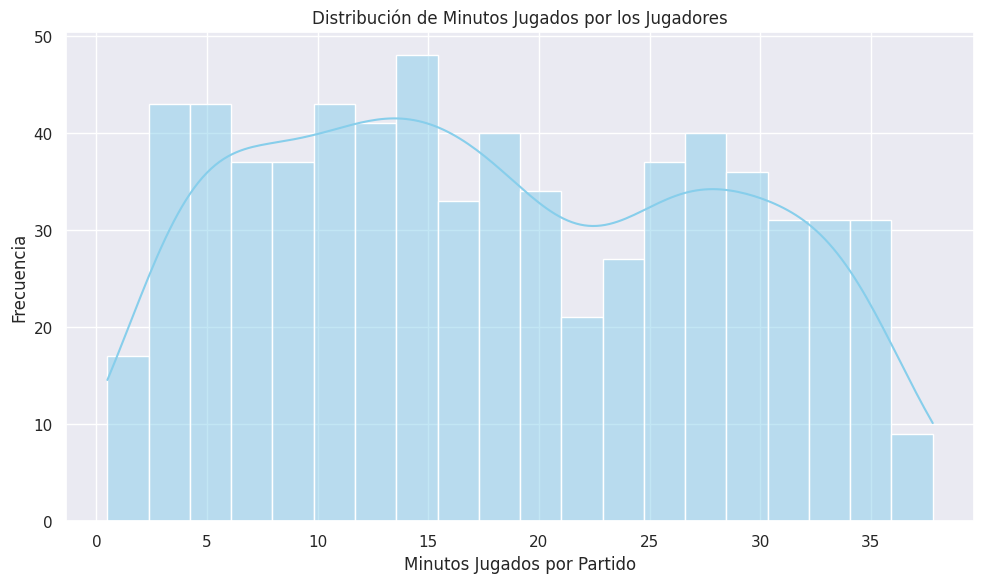

In [ ]:
#@title **Minutes Played Per Game**

# Graficar un histograma de los minutos jugados por los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='MP', bins=20, kde=True, color='skyblue')
plt.title('Distribución de Minutos Jugados por los Jugadores')
plt.xlabel('Minutos Jugados por Partido')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

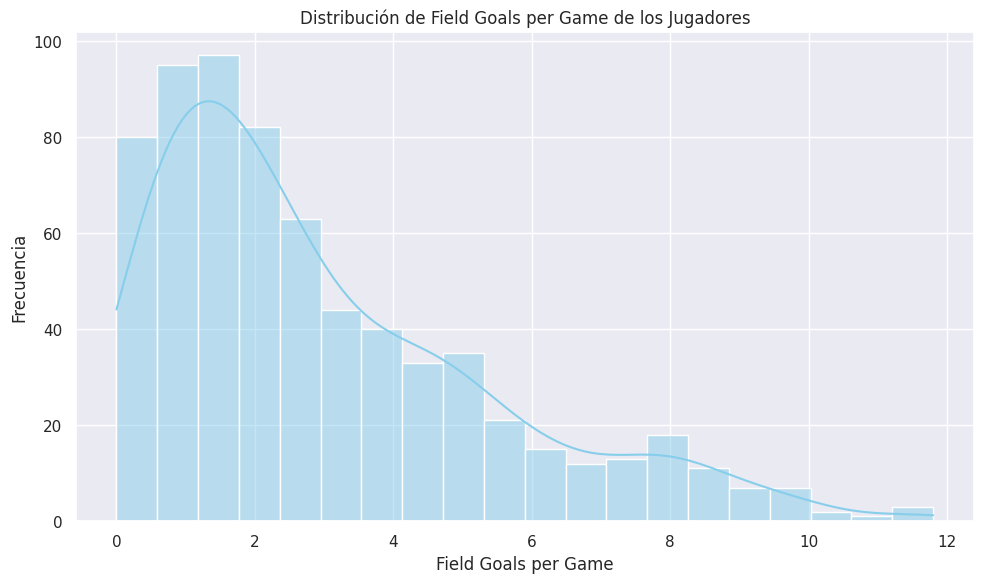

In [ ]:
#@title **Field Goals per Game**

# Graficar un histograma de los Field Goals per Game de los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='FG', bins=20, kde=True, color='skyblue')
plt.title('Distribución de Field Goals per Game de los Jugadores')
plt.xlabel('Field Goals per Game')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

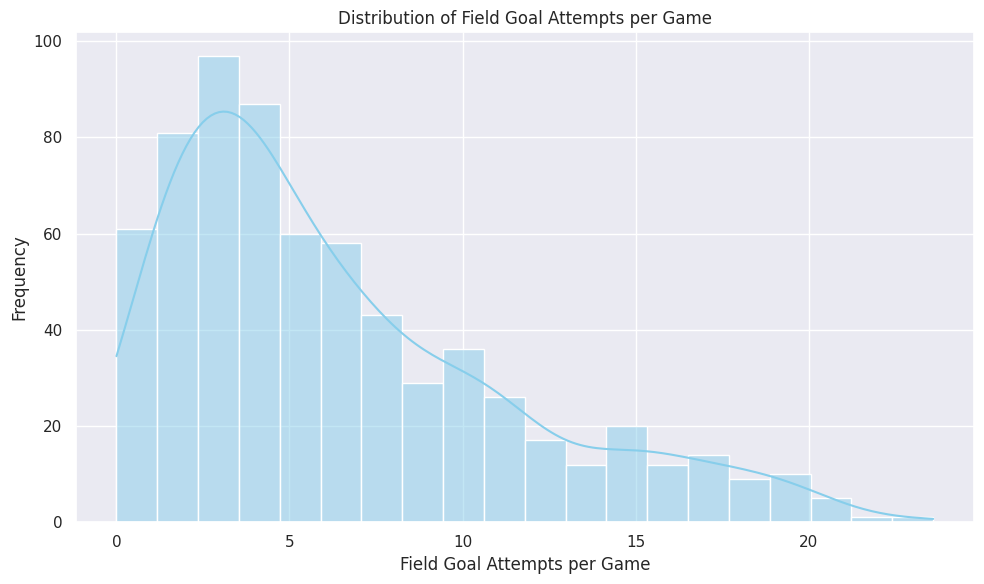

In [ ]:
#@title **Field Goals Attemps per Game**

# Plot a histogram of Field Goal Attempts per Game
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='FGA', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Field Goal Attempts per Game')
plt.xlabel('Field Goal Attempts per Game')
plt.ylabel('Frequency')
plt.grid(True)  # Add a grid to the plot
plt.tight_layout()
plt.show()

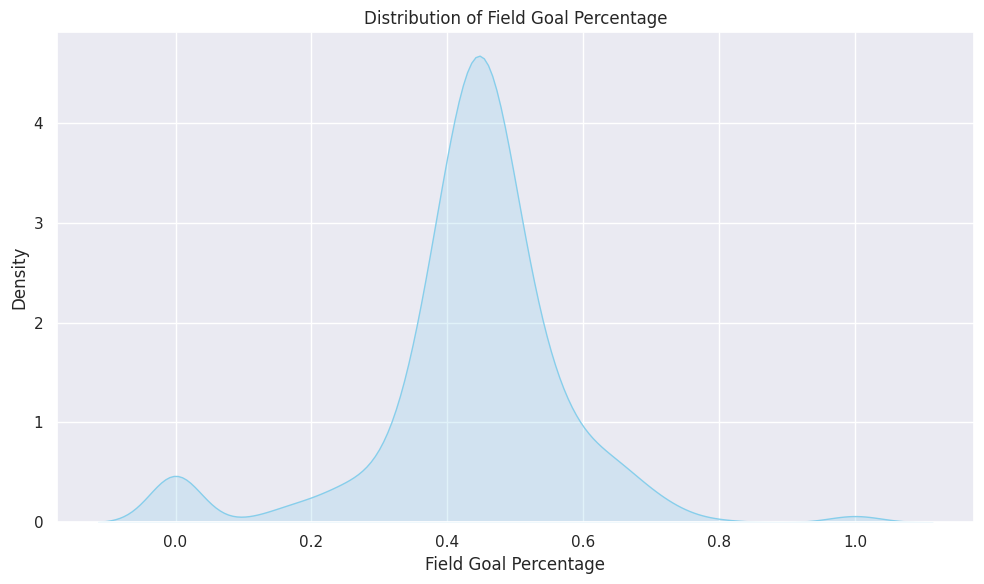

In [ ]:
#@title **Field Goals Percentage**

# Plot a KDE plot of Field Goal Percentage
plt.figure(figsize=(10, 6))
sns.kdeplot(data=nba_stats['FG%'], color='skyblue', fill=True)
plt.title('Distribution of Field Goal Percentage')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Density')
plt.grid(True)  # Add a grid to the plot
plt.tight_layout()
plt.show()

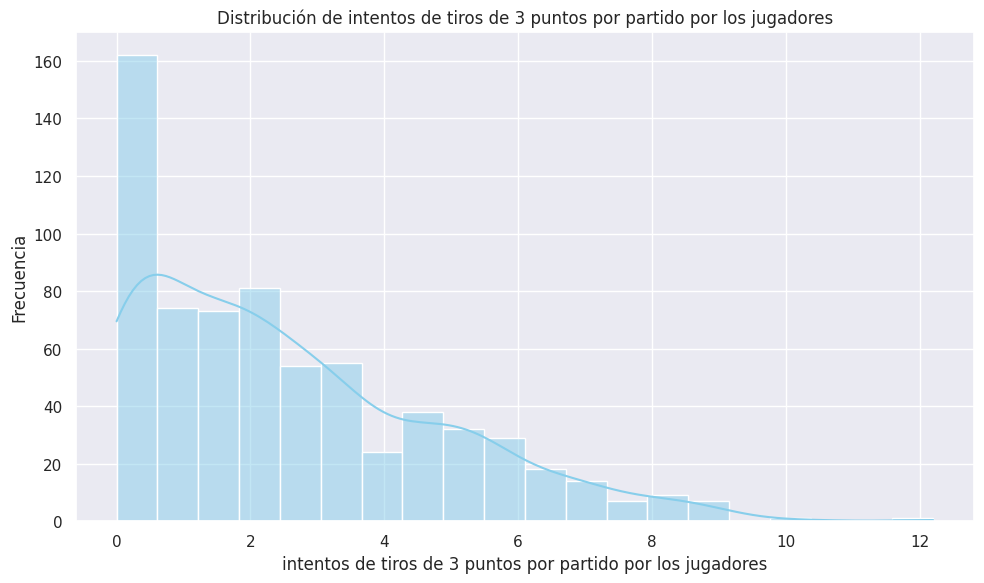

In [ ]:
#@title **3-point field goal attempts per game**
# Graficar un histograma de los intentos de tiros de 3 puntos por partido por los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='3PA', bins=20, kde=True, color='skyblue')
plt.title('Distribución de intentos de tiros de 3 puntos por partido por los jugadores')
plt.xlabel('Intentos de tiros de 3 puntos por partido por los jugadores')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

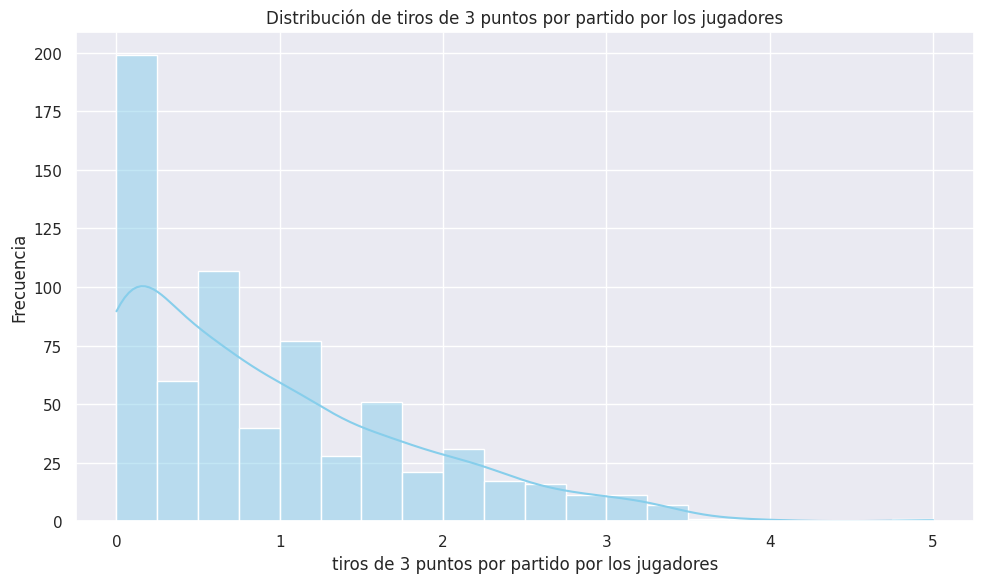

In [ ]:
#@title **3-point field goals per game**
# Graficar un histograma de los tiros de 3 puntos por partido por los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='3P', bins=20, kde=True, color='skyblue')
plt.title('Distribución de tiros de 3 puntos por partido por los jugadores')
plt.xlabel('Tiros de 3 puntos por partido por los jugadores')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

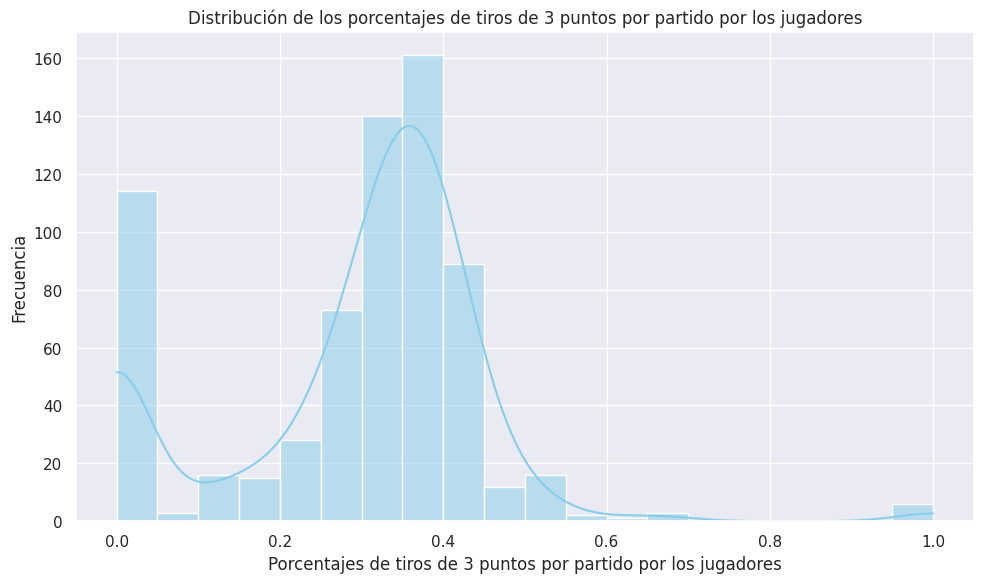

In [ ]:
#@title **3-point field goal percentage**
# Graficar un histograma de los procentajes de tiros de 3 puntos por partido por los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='3P%', bins=20, kde=True, color='skyblue')
plt.title('Distribución de los porcentajes de tiros de 3 puntos por partido por los jugadores')
plt.xlabel('Porcentajes de tiros de 3 puntos por partido por los jugadores')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

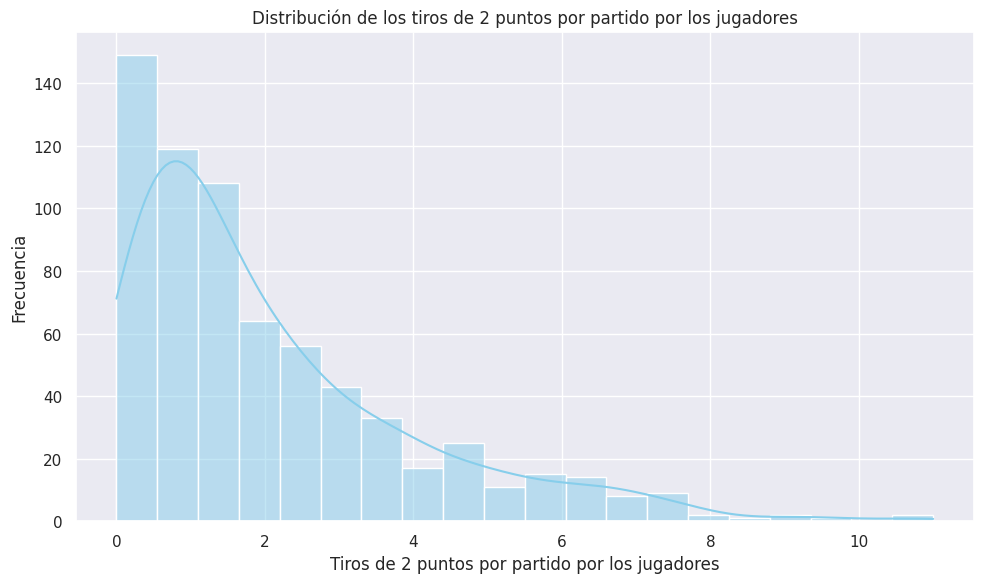

In [ ]:
#@title **2-point field goals per game**
# Graficar un histograma de los tiros de 2 puntos por partido por los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='2P', bins=20, kde=True, color='skyblue')
plt.title('Distribución de los tiros de 2 puntos por partido por los jugadores')
plt.xlabel('Tiros de 2 puntos por partido por los jugadores')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

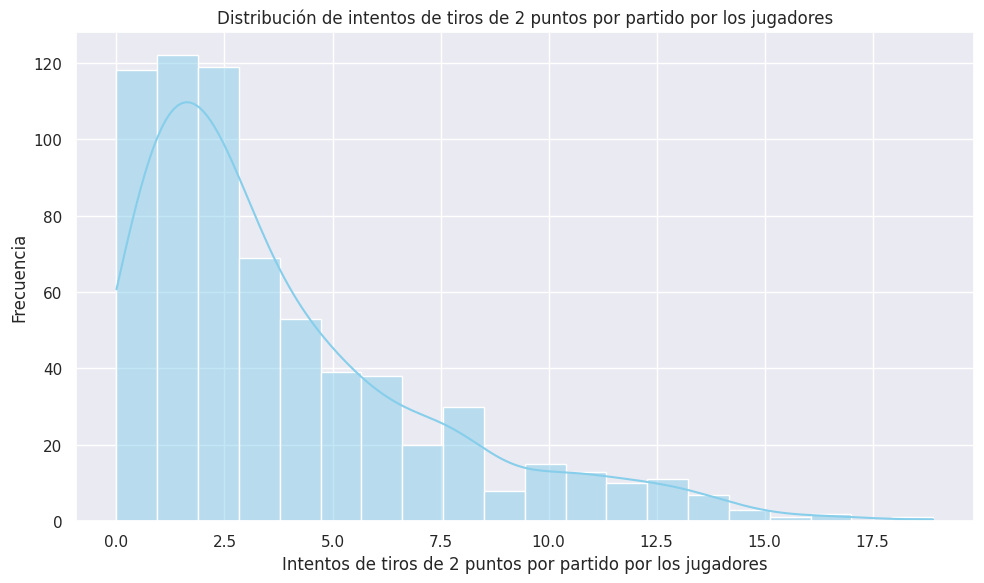

In [ ]:
#@title **2-point field goal attempts per game**
# Graficar un histograma de los intentos de tiros de 2 puntos por partido por los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='2PA', bins=20, kde=True, color='skyblue')
plt.title('Distribución de intentos de tiros de 2 puntos por partido por los jugadores')
plt.xlabel('Intentos de tiros de 2 puntos por partido por los jugadores')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

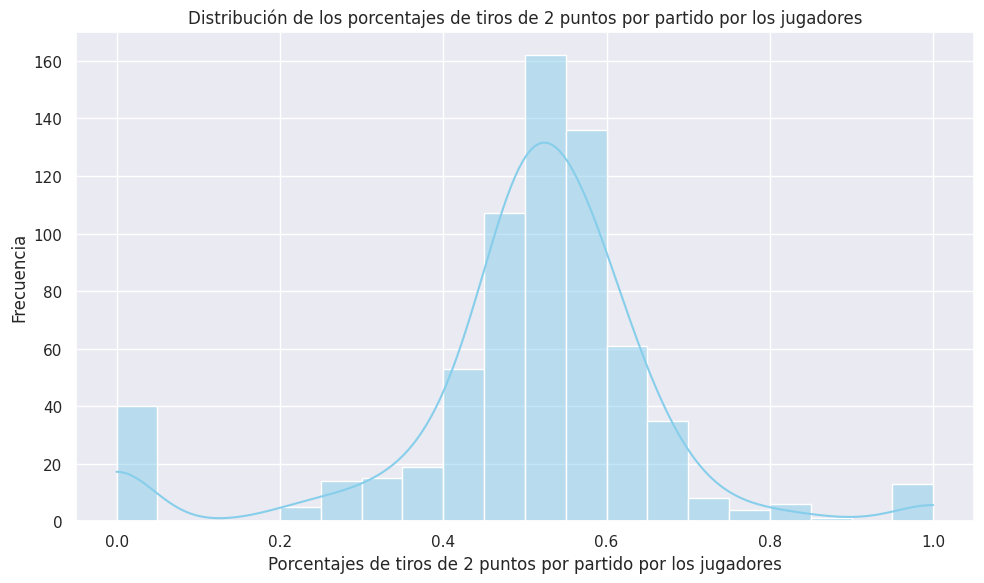

In [ ]:
#@title **2-point field goal percentage**
# Graficar un histograma de los procentajes de tiros de 2 puntos por partido por los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='2P%', bins=20, kde=True, color='skyblue')
plt.title('Distribución de los porcentajes de tiros de 2 puntos por partido por los jugadores')
plt.xlabel('Porcentajes de tiros de 2 puntos por partido por los jugadores')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

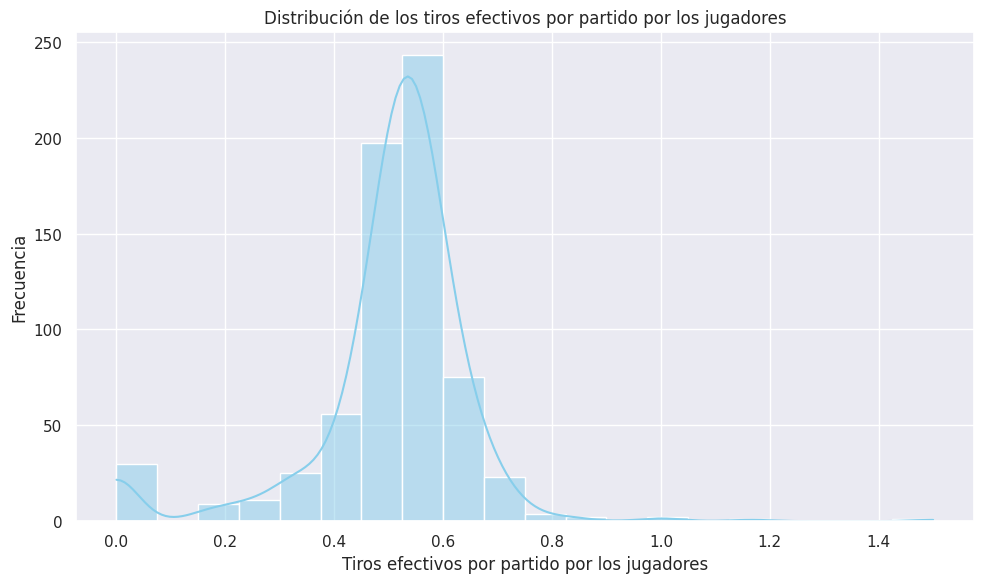

In [ ]:
#@title **Effective field goal percentage**
# Graficar un histograma de los tiros efectivos por partido por los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='eFG%', bins=20, kde=True, color='skyblue')
plt.title('Distribución de los tiros efectivos por partido por los jugadores')
plt.xlabel('Tiros efectivos por partido por los jugadores')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

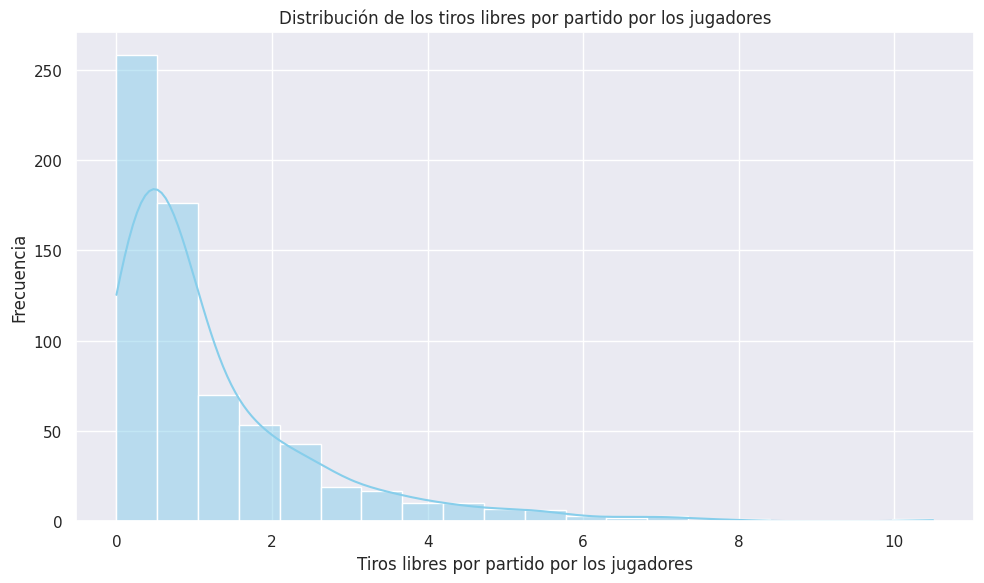

In [ ]:
#@title **Free throws per game**
# Graficar un histograma de los tiros libres por partido por los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='FT', bins=20, kde=True, color='skyblue')
plt.title('Distribución de los tiros libres por partido por los jugadores')
plt.xlabel('Tiros libres por partido por los jugadores')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

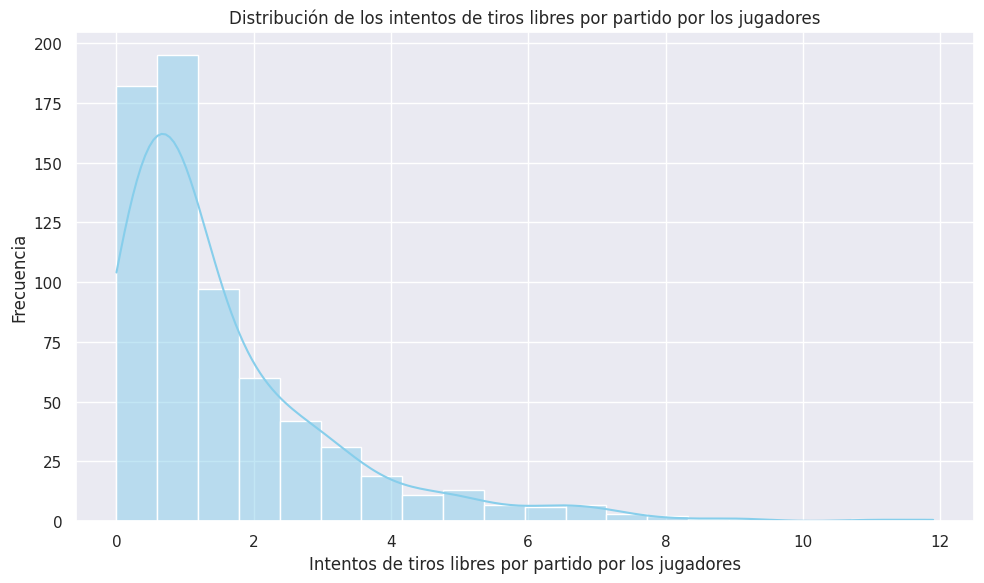

In [ ]:
#@title **Free throw attempts per game**
# Graficar un histograma de los intentos de tiros libres por partido por los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='FTA', bins=20, kde=True, color='skyblue')
plt.title('Distribución de los intentos de tiros libres por partido por los jugadores')
plt.xlabel('Intentos de tiros libres por partido por los jugadores')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

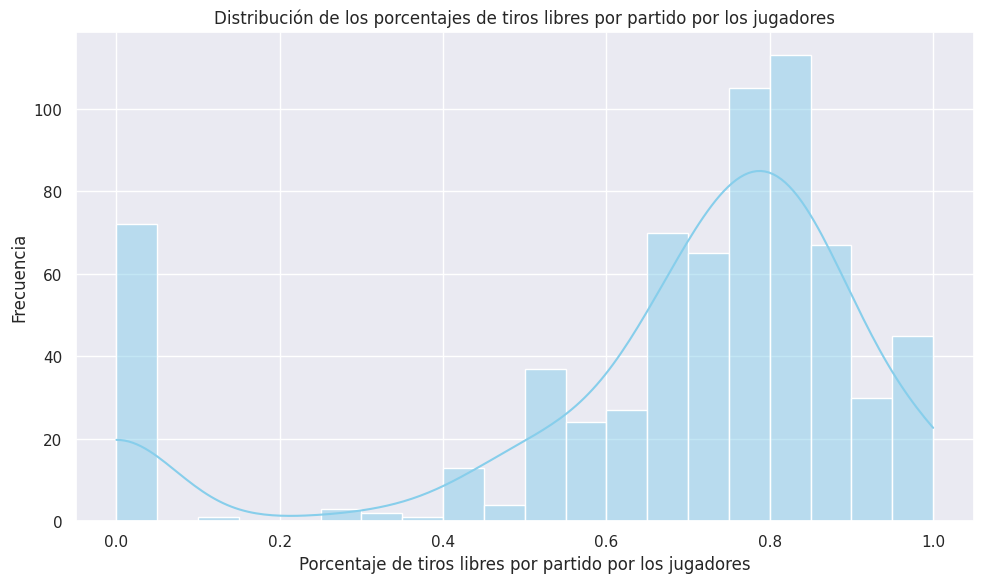

In [ ]:
#@title **Free throw per game percentage**
# Graficar un histograma de los intentos de tiros libres por partido por los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='FT%', bins=20, kde=True, color='skyblue')
plt.title('Distribución de los porcentajes de tiros libres por partido por los jugadores')
plt.xlabel('Porcentaje de tiros libres por partido por los jugadores')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

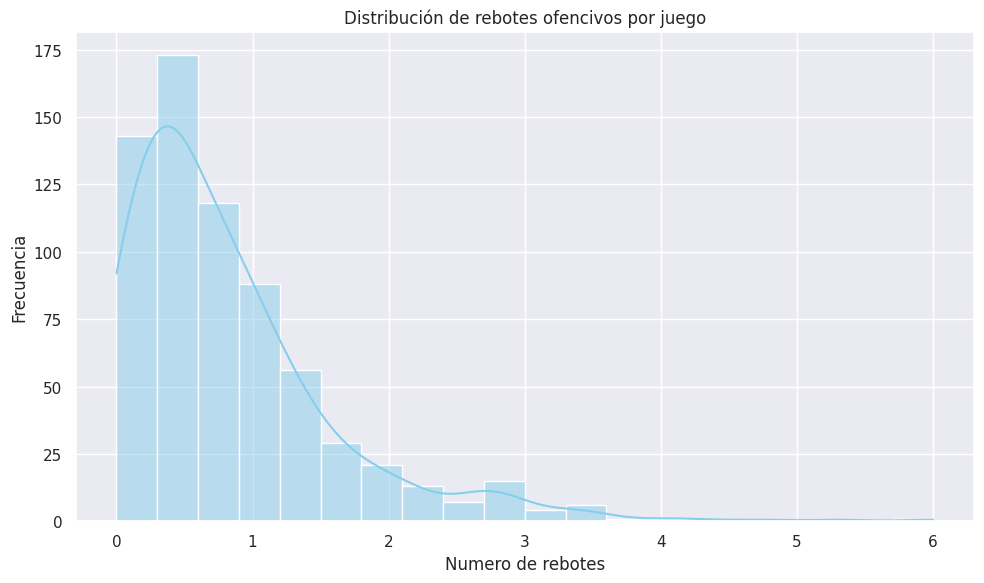

In [ ]:
# @title **Offensive rebounds per game**
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='ORB', bins=20, kde=True, color='skyblue')
plt.title('Distribución de rebotes ofencivos por juego')
plt.xlabel('Numero de rebotes')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

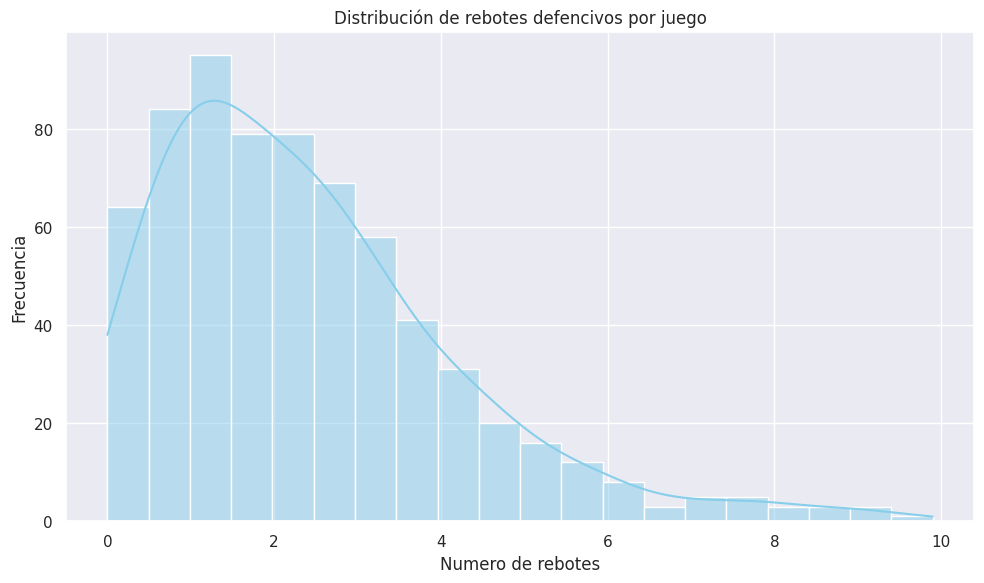

In [ ]:
# @title **Defensive rebounds per game**
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='DRB', bins=20, kde=True, color='skyblue')
plt.title('Distribución de rebotes defencivos por juego')
plt.xlabel('Numero de rebotes')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

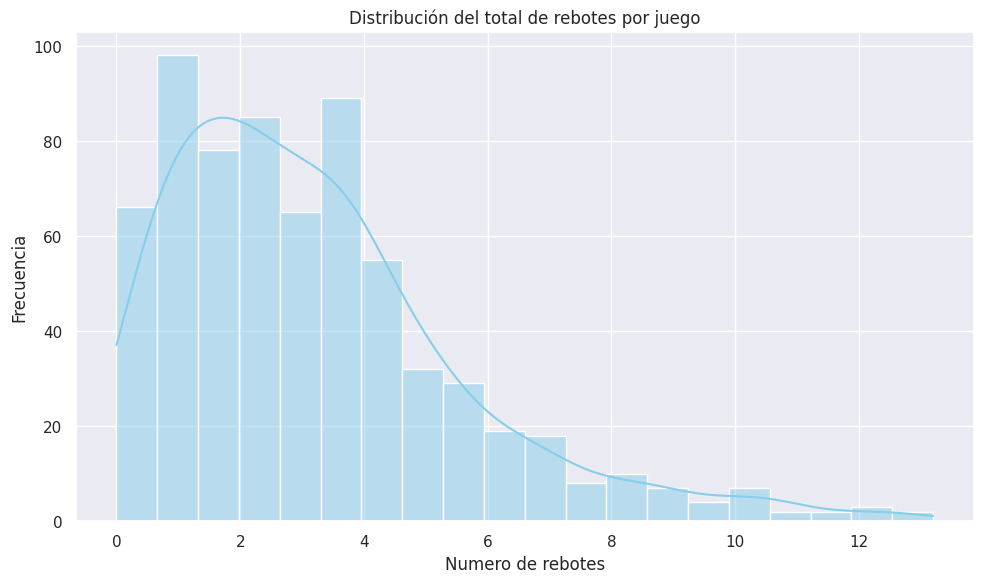

In [ ]:
# @title **Total rebounds per game**
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='TRB', bins=20, kde=True, color='skyblue')
plt.title('Distribución del total de rebotes por juego')
plt.xlabel('Numero de rebotes')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

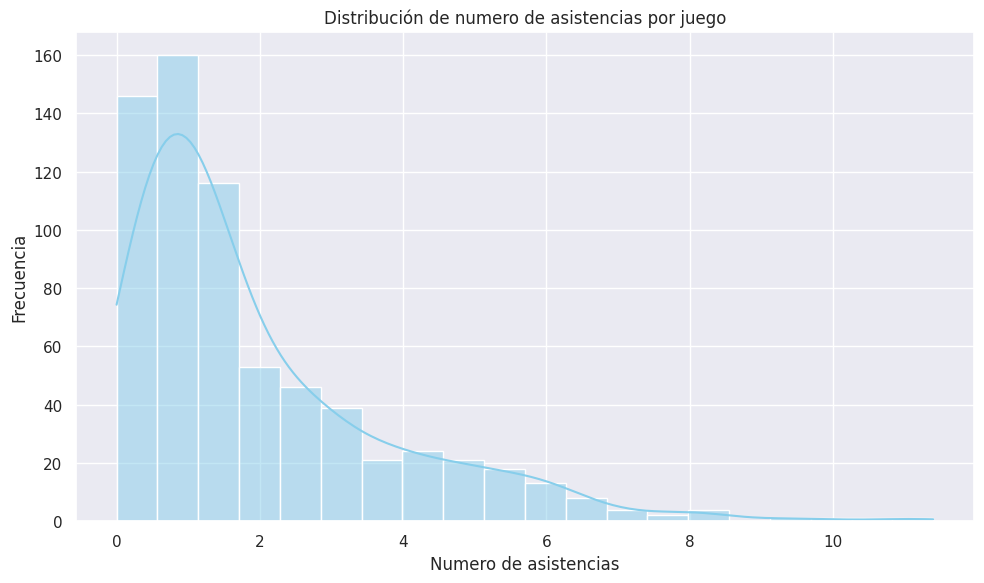

In [ ]:
# @title **Assists per game**
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='AST', bins=20, kde=True, color='skyblue')
plt.title('Distribución de numero de asistencias por juego')
plt.xlabel('Numero de asistencias')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

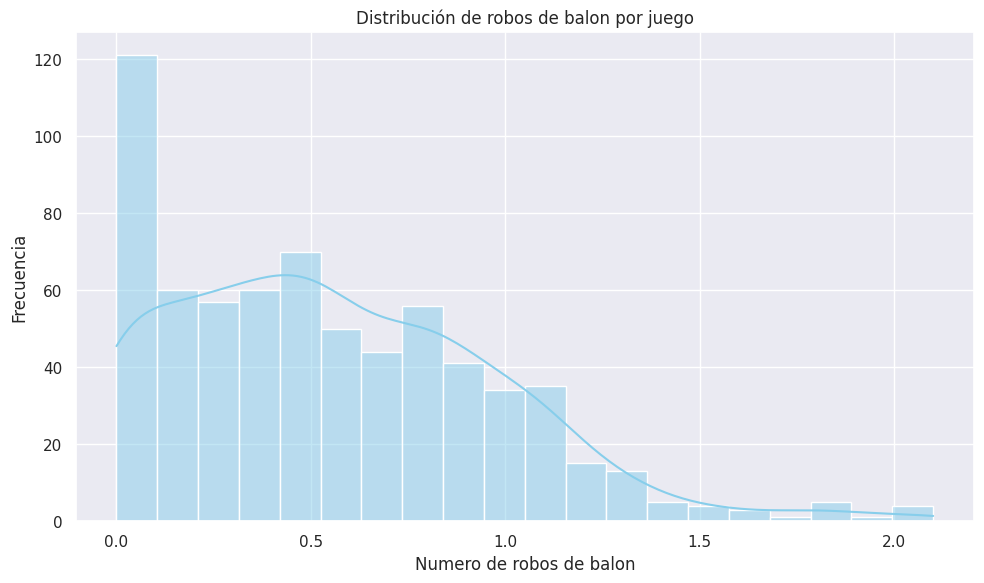

In [ ]:
# @title **Steals per game**
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='STL', bins=20, kde=True, color='skyblue')
plt.title('Distribución de robos de balon por juego')
plt.xlabel('Numero de robos de balon')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

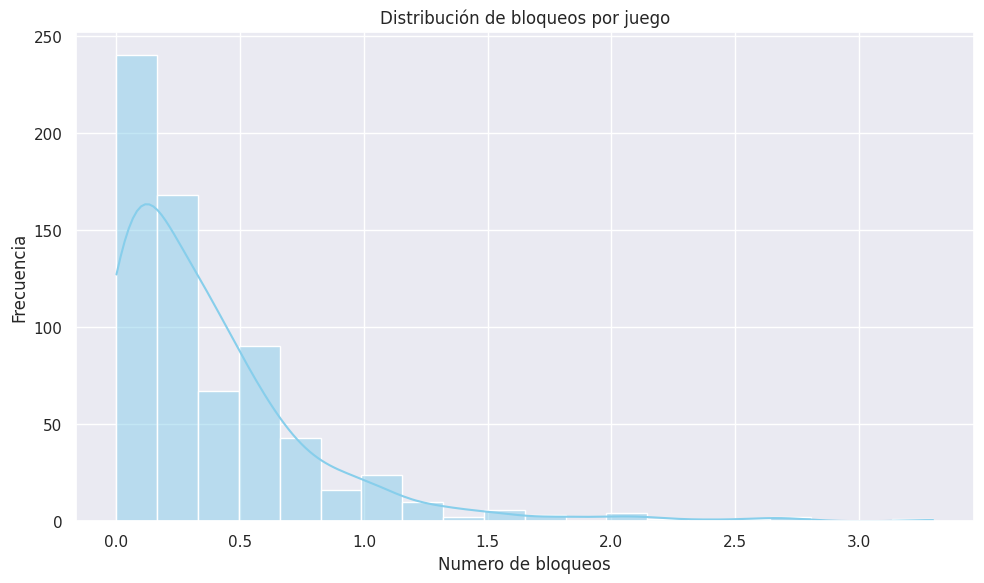

In [ ]:
# @title **Blocks per game**
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='BLK', bins=20, kde=True, color='skyblue')
plt.title('Distribución de bloqueos por juego')
plt.xlabel('Numero de bloqueos')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()

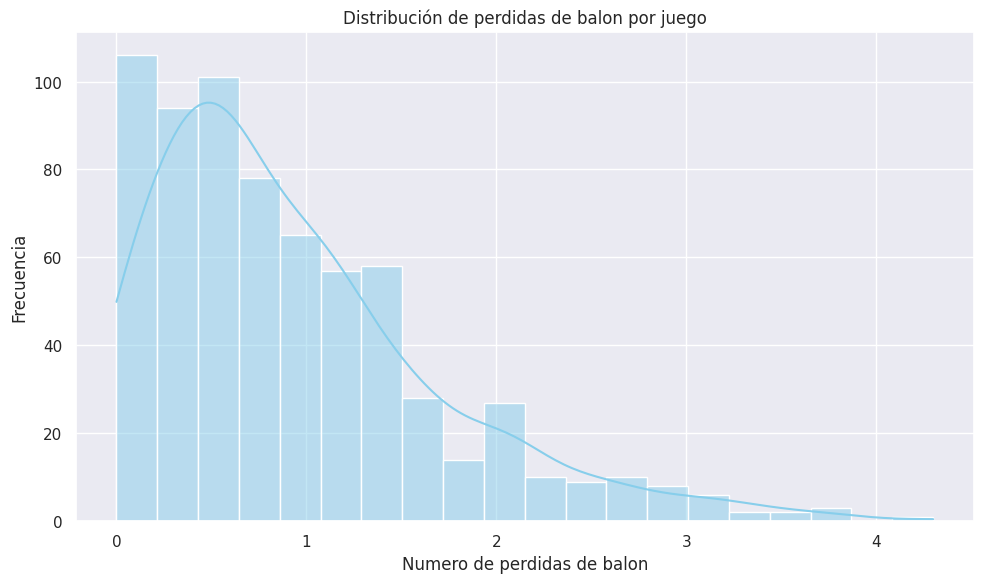

In [ ]:
# @title **Turnovers per game**
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='TOV', bins=20, kde=True, color='skyblue')
plt.title('Distribución de perdidas de balon por juego')
plt.xlabel('Numero de perdidas de balon')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()


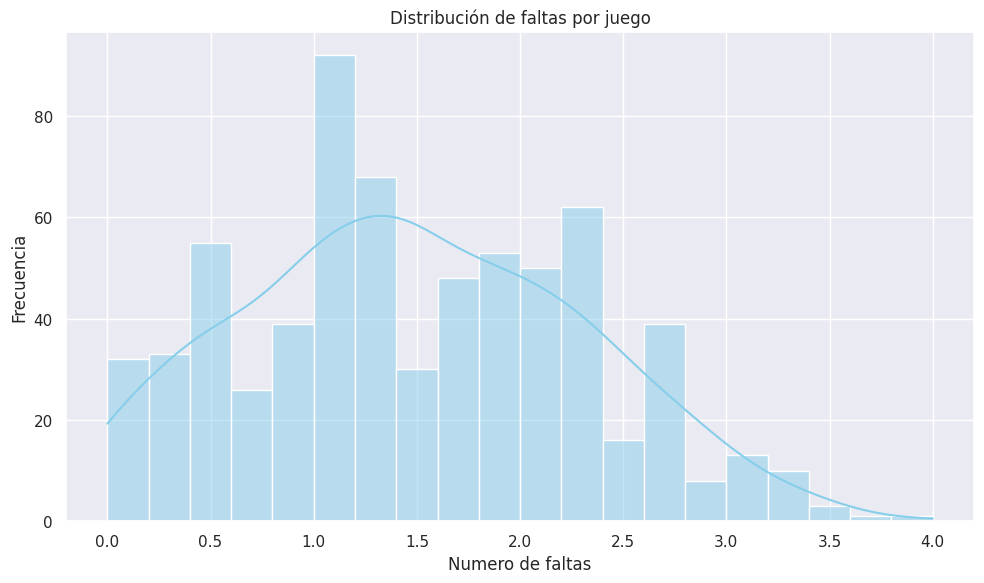

In [ ]:
# @title **Personal fouls per game**
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='PF', bins=20, kde=True, color='skyblue')
plt.title('Distribución de faltas por juego')
plt.xlabel('Numero de faltas')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()


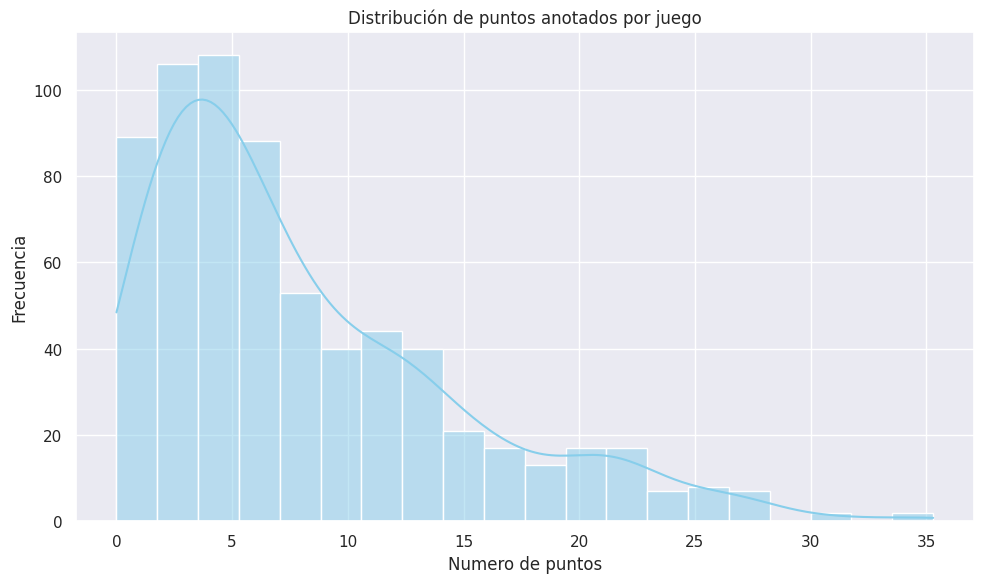

In [ ]:
# @title **Points per game**
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_stats, x='PTS', bins=20, kde=True, color='skyblue')
plt.title('Distribución de puntos anotados por juego')
plt.xlabel('Numero de puntos')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()


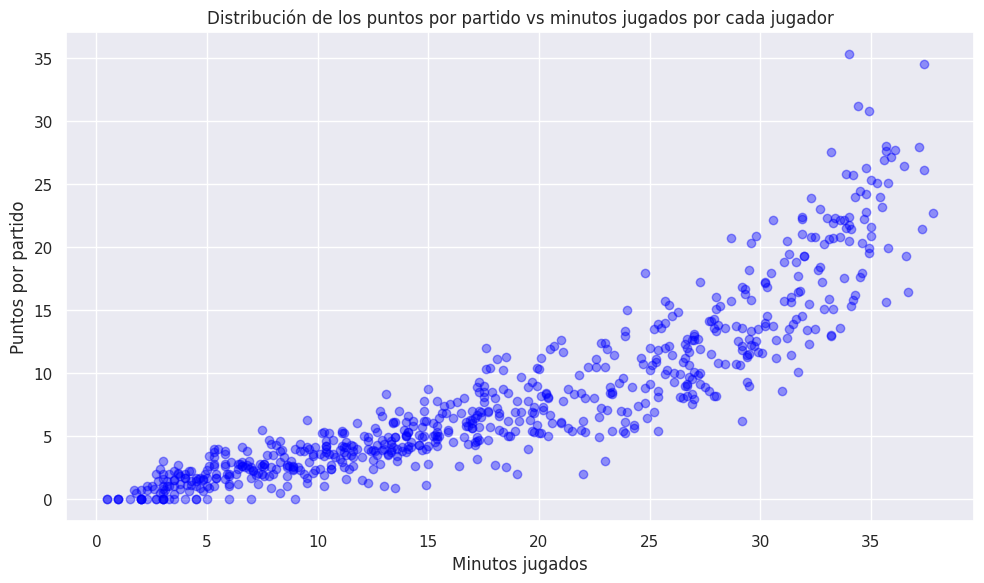

In [ ]:
#@title **Scatter Points per game VS Minutes played per game**
# Graficar un Scatter de los puntos por partido vs los minutos jugados por cada jugador
plt.figure(figsize=(10, 6))
plt.scatter(data=nba_stats , x="MP",  y="PTS", c="blue", alpha=0.4)
plt.title('Distribución de los puntos por partido vs minutos jugados por cada jugador')
plt.xlabel('Minutos jugados')
plt.ylabel('Puntos por partido')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()


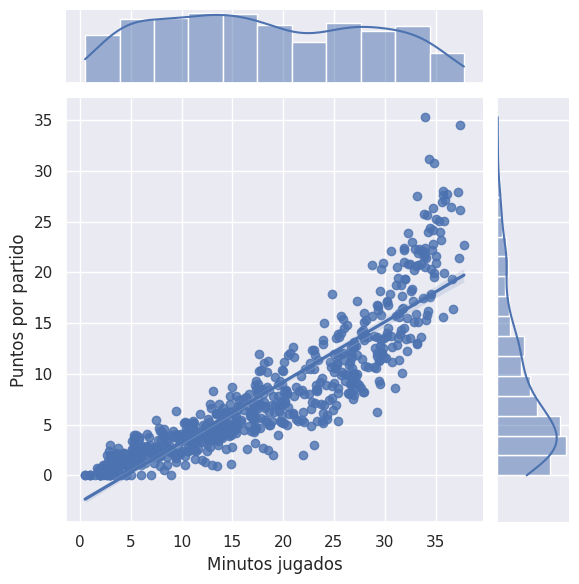

In [ ]:
#@title **Jointplot Points per game VS Minutes played per game**
# Graficar un Scatter de los puntos por partido vs los minutos jugados por cada jugador
sns.jointplot(data=nba_stats , x="MP", y="PTS" , kind='reg');
plt.xlabel('Minutos jugados')
plt.ylabel('Puntos por partido')
plt.show()

In [ ]:
#@title **Preprocesamiento**

# Cargar el dataset
nba_stats = pd.read_csv('data/NBA.csv', sep=';', encoding='latin-1')

# Aplicar OneHotEncoder a la columna categórica 'Tm' y 'Player' usando pd.get_dummies
nba_stats = pd.get_dummies(nba_stats, columns=['Tm', 'Player'])

# Contar el número de ejemplos por clase
class_counts = nba_stats['Pos'].value_counts()

# Definir un umbral para eliminar clases con pocos ejemplos
threshold = 10  # Puedes ajustar este valor según sea necesario

# Eliminar las clases con pocos ejemplos
to_remove = class_counts[class_counts < threshold].index
print(to_remove)
nba_stats = nba_stats[~nba_stats['Pos'].isin(to_remove)]


Index(['SG-PG', 'C-PF', 'PF-SF', 'PF-C', 'SF-PF', 'SF-SG', 'PG-SG'], dtype='object', name='Pos')


In [ ]:
#@title **Particionado**
# Definir las características (X) y la variable objetivo (y)
X = nba_stats.drop(columns=['Pos'])
y = nba_stats['Pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# @title **Decision tree: parametros por defecto**
est = DecisionTreeClassifier()
est.fit(X_train,y_train)
accuracy = accuracy_score(est.predict(X_test), y_test)
print(f"Accuracy con parámetros por defecto: {accuracy}")

Accuracy con parámetros por defecto: 0.5149253731343284


In [ ]:
# @title **Decision tree: tunning de parametros**

param_grid = {
    'max_depth': [None, 2, 5, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_

best_est = DecisionTreeClassifier(**best_params)
best_est.fit(X_train, y_train)


tuned_accuracy = accuracy_score(y_test, best_est.predict(X_test))
print(f"Accuracy con tuning de parámetros: {tuned_accuracy}")

Accuracy con tuning de parámetros: 0.5447761194029851


In [ ]:
# @title **Decision tree con Crossvalidation**
est_default = DecisionTreeClassifier()
est_default.fit(X_train,y_train)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(est_default, X_train, y_train, cv=kf, scoring='accuracy')

mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print(f"Accuracy media con CrossValidation: {mean_accuracy}")
print(f"Desviación estándar del accuracy: {std_accuracy}")

Accuracy media con CrossValidation: 0.40213137665967863
Desviación estándar del accuracy: 0.07893675682476003


In [ ]:
# @title **Ramdom State de mayor accuracy**
best_accuracy = 0
best_random_state = None

# Probar diferentes random_states
for random_state in range(100):  # Puedes ajustar el rango según tus necesidades
    est = DecisionTreeClassifier(random_state=random_state)
    est.fit(X_train, y_train)
    accuracy = accuracy_score(est.predict(X_test), y_test)

    # Actualizar el mejor accuracy y random_state si el actual es mejor
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

# Imprimir el mejor random_state y su accuracy
print(f"Mejor Random State: {best_random_state}")
print(f"Mejor Accuracy: {best_accuracy}")

Mejor Random State: 55
Mejor Accuracy: 0.5970149253731343


In [ ]:
# @title **Random Forest: parametros por defecto**
est = RandomForestClassifier()
est.fit(X_train,y_train)

print(accuracy_score(est.predict(X_test), y_test))

0.5597014925373134


In [ ]:
#@title **Random Forest: tunning de parametros**

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_est = RandomForestClassifier(**best_params)
best_est.fit(X_train, y_train)

tuned_accuracy = accuracy_score(y_test, best_est.predict(X_test))
print(f"Accuracy con tuning de parámetros: {tuned_accuracy}")

Accuracy con tuning de parámetros: 0.6119402985074627


In [ ]:
# @title **Ramdom state de mayor accuracy**
best_accuracy = 0
best_random_state = None

# Probar diferentes random_states
for random_state in range(100):  # Puedes ajustar el rango según tus necesidades
    est = RandomForestClassifier(random_state=random_state)
    est.fit(X_train, y_train)
    accuracy = accuracy_score(est.predict(X_test), y_test)

    # Actualizar el mejor accuracy y random_state si el actual es mejor
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

# Imprimir el mejor random_state y su accuracy
print(f"Mejor Random State: {best_random_state}")
print(f"Mejor Accuracy: {best_accuracy}")

Mejor Random State: 59
Mejor Accuracy: 0.664179104477612


In [ ]:
#@title **SVM: parametros por defecto**
svc = SVC()
svc.fit(X_train, y_train)

# Predecir y calcular la precisión
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy con SVC (parámetros por defecto): {accuracy}")



Accuracy con SVC (parámetros por defecto): 0.20149253731343283


In [ ]:
#@title **SVM: tunning de parametros**

# Definir los parámetros a probar en el GridSearchCV
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Configurar el GridSearchCV con validación cruzada de 5 pliegues
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mostrar los resultados de todos los parámetros probados
results = grid_search.cv_results_
for mean, std, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"Mean accuracy: {mean:.4f} (std: {std:.4f}) with parameters: {params}")

# Mejor modelo y su precisión
best_svc = grid_search.best_estimator_
best_accuracy = grid_search.best_score_
print(f"Mejor kernel: {grid_search.best_params_['kernel']}")
print(f"Mejor accuracy con tuning de parámetros: {best_accuracy}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en el conjunto de prueba con el mejor kernel: {accuracy}")

Mean accuracy: 0.5056 (std: 0.0069) with parameters: {'kernel': 'linear'}
Mean accuracy: 0.2538 (std: 0.0133) with parameters: {'kernel': 'poly'}
Mean accuracy: 0.2557 (std: 0.0130) with parameters: {'kernel': 'rbf'}
Mean accuracy: 0.1673 (std: 0.0262) with parameters: {'kernel': 'sigmoid'}
Mejor kernel: linear
Mejor accuracy con tuning de parámetros: 0.5056427437841651
Accuracy en el conjunto de prueba con el mejor kernel: 0.5447761194029851


In [ ]:
# @title **Deep learning 1 capa oculta**

nba_stats = pd.read_csv('data/NBA.csv', sep=';', encoding='latin-1')

# Preprocesamiento: eliminar la columna 'Player'
nba_stats = nba_stats.drop(columns=['Player'])

# Contar el número de ejemplos por clase
class_counts = nba_stats['Pos'].value_counts()

# Definir un umbral para eliminar clases con pocos ejemplos
threshold = 10  # Puedes ajustar este valor según sea necesario

# Eliminar las clases con pocos ejemplos
to_remove = class_counts[class_counts < threshold].index
print(f"Clases a eliminar por tener menos de {threshold} ejemplos: {to_remove.tolist()}")
nba_stats = nba_stats[~nba_stats['Pos'].isin(to_remove)]

# Definir las características (X) y la variable objetivo (y)
X = nba_stats.drop(columns=['Pos'])
y = nba_stats['Pos']

# Aplicar OneHotEncoder a la columna categórica 'Tm' usando pd.get_dummies
X = pd.get_dummies(X, columns=['Tm'])

# Codificar las etiquetas de la variable objetivo
y = pd.factorize(y)[0]

# Dividir el dataset en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Normalizar las características (excepto las columnas one-hot encoded)
for col in X_train.columns:
    if 'Tm_' not in col:  # No normalizar las columnas one-hot encoded
        max_value = X_train[col].max()
        if max_value != 0:
            X_train[col] = X_train[col] / max_value
            X_test[col] = X_test[col] / max_value

# Asegurarnos de que no haya valores NaN en los datos
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Convertir los datos a tipo float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Número de clases
num_c = np.unique(y).shape[0]

# One-hot encoding de las etiquetas
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=num_c)

# Definir la arquitectura de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_c, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar y evaluar el modelo para 10, 20 y 30 épocas
for epochs in [10, 20, 30]:
    print(f"Entrenando el modelo con {epochs} épocas...")
    model.fit(X_train, y_train_ohe, epochs=epochs, batch_size=64, verbose=1)

    # Evaluar el modelo en el conjunto de prueba
    probs = model.predict(X_test)
    preds = np.argmax(probs, axis=1)
    accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), preds)
    print(f"Accuracy con {epochs} épocas: {accuracy:.4f}")

Clases a eliminar por tener menos de 10 ejemplos: ['SG-PG', 'C-PF', 'PF-SF', 'PF-C', 'SF-PF', 'SF-SG', 'PG-SG']
Entrenando el modelo con 10 épocas...
Epoch 1/10
9/9 [==============================] - 1s 3ms/step - loss: 1.6298 - accuracy: 0.2124
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 1.6254 - accuracy: 0.2274
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 1.6216 - accuracy: 0.2312
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 1.6181 - accuracy: 0.2143
Epoch 5/10
9/9 [==============================] - 0s 3ms/step - loss: 1.6152 - accuracy: 0.2143
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 1.6124 - accuracy: 0.2293
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 1.6101 - accuracy: 0.2105
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 1.6082 - accuracy: 0.2180
Epoch 9/10
9/9 [==============================] - 0s 4ms/step - loss: 1.6061 - acc

In [ ]:
# @title Deep learning con 3 capas ocultas
nba_stats = pd.read_csv('data/NBA.csv', sep=';', encoding='latin-1')

# Preprocesamiento: eliminar la columna 'Player'
nba_stats = nba_stats.drop(columns=['Player'])

# Contar el número de ejemplos por clase
class_counts = nba_stats['Pos'].value_counts()

# Definir un umbral para eliminar clases con pocos ejemplos
threshold = 10  # Puedes ajustar este valor según sea necesario

# Eliminar las clases con pocos ejemplos
to_remove = class_counts[class_counts < threshold].index
print(f"Clases a eliminar por tener menos de {threshold} ejemplos: {to_remove.tolist()}")
nba_stats = nba_stats[~nba_stats['Pos'].isin(to_remove)]

# Definir las características (X) y la variable objetivo (y)
X = nba_stats.drop(columns=['Pos'])
y = nba_stats['Pos']

# Aplicar OneHotEncoder a la columna categórica 'Tm' usando pd.get_dummies
X = pd.get_dummies(X, columns=['Tm'])

# Codificar las etiquetas de la variable objetivo
y = pd.factorize(y)[0]

# Dividir el dataset en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Normalizar las características (excepto las columnas one-hot encoded)
for col in X_train.columns:
    if 'Tm_' not in col:  # No normalizar las columnas one-hot encoded
        max_value = X_train[col].max()
        if max_value != 0:
            X_train[col] = X_train[col] / max_value
            X_test[col] = X_test[col] / max_value

# Asegurarnos de que no haya valores NaN en los datos
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Convertir los datos a tipo float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Número de clases
num_c = np.unique(y).shape[0]

# One-hot encoding de las etiquetas
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=num_c)

# Definir la arquitectura de la red neuronal con tres capas ocultas
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_c, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar y evaluar el modelo para 10, 20 y 30 épocas
for epochs in [10, 20, 30]:
    print(f"Entrenando el modelo con {epochs} épocas...")
    model.fit(X_train, y_train_ohe, epochs=epochs, batch_size=64, verbose=1)

    # Evaluar el modelo en el conjunto de prueba
    probs = model.predict(X_test)
    preds = np.argmax(probs, axis=1)
    accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), preds)
    print(f"Accuracy con {epochs} épocas: {accuracy:.4f}")

Clases a eliminar por tener menos de 10 ejemplos: ['SG-PG', 'C-PF', 'PF-SF', 'PF-C', 'SF-PF', 'SF-SG', 'PG-SG']
Entrenando el modelo con 10 épocas...
Epoch 1/10
9/9 [==============================] - 1s 6ms/step - loss: 1.6144 - accuracy: 0.2030
Epoch 2/10
9/9 [==============================] - 0s 6ms/step - loss: 1.6099 - accuracy: 0.2068
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 1.6063 - accuracy: 0.2068
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 1.6034 - accuracy: 0.1955
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 1.6004 - accuracy: 0.1898
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 1.5980 - accuracy: 0.2068
Epoch 7/10
9/9 [==============================] - 0s 5ms/step - loss: 1.5959 - accuracy: 0.2218
Epoch 8/10
9/9 [==============================] - 0s 5ms/step - loss: 1.5936 - accuracy: 0.2274
Epoch 9/10
9/9 [==============================] - 0s 5ms/step - loss: 1.5915 - acc

In [ ]:
# @title Deep learning con 6 capas ocultas
nba_stats = pd.read_csv('data/NBA.csv', sep=';', encoding='latin-1')

# Preprocesamiento: eliminar la columna 'Player'
nba_stats = nba_stats.drop(columns=['Player'])

# Contar el número de ejemplos por clase
class_counts = nba_stats['Pos'].value_counts()

# Definir un umbral para eliminar clases con pocos ejemplos
threshold = 10  # Puedes ajustar este valor según sea necesario

# Eliminar las clases con pocos ejemplos
to_remove = class_counts[class_counts < threshold].index
print(f"Clases a eliminar por tener menos de {threshold} ejemplos: {to_remove.tolist()}")
nba_stats = nba_stats[~nba_stats['Pos'].isin(to_remove)]

# Definir las características (X) y la variable objetivo (y)
X = nba_stats.drop(columns=['Pos'])
y = nba_stats['Pos']

# Aplicar OneHotEncoder a la columna categórica 'Tm' usando pd.get_dummies
X = pd.get_dummies(X, columns=['Tm'])

# Codificar las etiquetas de la variable objetivo
y = pd.factorize(y)[0]

# Dividir el dataset en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Normalizar las características (excepto las columnas one-hot encoded)
for col in X_train.columns:
    if 'Tm_' not in col:  # No normalizar las columnas one-hot encoded
        max_value = X_train[col].max()
        if max_value != 0:
            X_train[col] = X_train[col] / max_value
            X_test[col] = X_test[col] / max_value

# Asegurarnos de que no haya valores NaN en los datos
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Convertir los datos a tipo float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Número de clases
num_c = np.unique(y).shape[0]

# One-hot encoding de las etiquetas
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=num_c)

# Definir la arquitectura de la red neuronal con seis capas ocultas
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_c, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar y evaluar el modelo para 10, 20 y 30 épocas
for epochs in [10, 20, 30]:
    print(f"Entrenando el modelo con {epochs} épocas...")
    model.fit(X_train, y_train_ohe, epochs=epochs, batch_size=64, verbose=1)

    # Evaluar el modelo en el conjunto de prueba
    probs = model.predict(X_test)
    preds = np.argmax(probs, axis=1)
    accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), preds)
    print(f"Accuracy con {epochs} épocas: {accuracy:.4f}")

Clases a eliminar por tener menos de 10 ejemplos: ['SG-PG', 'C-PF', 'PF-SF', 'PF-C', 'SF-PF', 'SF-SG', 'PG-SG']
Entrenando el modelo con 10 épocas...
Epoch 1/10
9/9 [==============================] - 2s 8ms/step - loss: 1.6098 - accuracy: 0.2143
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 1.6093 - accuracy: 0.2143
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 1.6088 - accuracy: 0.2218
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 1.6083 - accuracy: 0.2218
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 1.6079 - accuracy: 0.2199
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 1.6074 - accuracy: 0.2237
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 1.6069 - accuracy: 0.2218
Epoch 8/10
9/9 [==============================] - 0s 5ms/step - loss: 1.6067 - accuracy: 0.2218
Epoch 9/10
9/9 [==============================] - 0s 8ms/step - loss: 1.6063 - acc